In [115]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from constants import PROJECT_DIR, PLOT_DIR, GENDER_DATA_PATH
from itertools import chain

In [441]:
def createPlotStyle(title, xlabel, ylabel, upperBoundYTicks, stepSize):
    plt.title(title, fontsize=25,fontweight='bold', pad= 30)
    plt.ylabel(ylabel,fontsize=15,fontweight='bold',labelpad= 20)
    plt.yticks(np.arange(0,upperBoundYTicks,stepSize))
    plt.xlabel(xlabel,fontsize=15,fontweight='bold',labelpad= 20)
    plt.xticks(rotation=45, ha='right', fontsize=10)

# Loading Datasets with pandas

In [183]:
studentsDataFrame = pd.read_excel(
    GENDER_DATA_PATH,
    header=[0,1,2],
    index_col=[0,1])
studentsDataFrame.fillna(0, inplace=True)

studentsDataFrame.index.names = ["Fach", "Geschlecht"]
studentsDataFrame

WiSe 2005/2006  \
                                                                nicht in BRD   
Geschlecht                                                    Anzahl (Fälle)   
Fach                                               Geschlecht                  
Sciences                                           männlich              0.0   
                                                   weiblich              0.0   
Vorbereitung Promotion Mathematisch-Naturwissen... männlich              0.0   
                                                   weiblich              0.0   
Vorübergehender Forschungsaufenthalt Mathematis... männlich              0.0   
...                                                                      ...   
Medizininformatik/Medical Informatics              weiblich              0.0   
Bioinformatik/Bioinformatics                       männlich              0.0   
                                                   weiblich              0.0   
Medieninformatik                                   männlich              0.0   
                                                   weiblich              0.0   

                                                                              \
                                                                    Bachelor   
Geschlecht                                                    Anzahl (Fälle)   
Fach                                               Geschlecht                  
Sciences                                           männlich              0.0   
                                                   weiblich              0.0   
Vorbereitung Promotion Mathematisch-Naturwissen... männlich              0.0   
                                                   weiblich              0.0   
Vorübergehender Forschungsaufenthalt Mathematis... männlich              0.0   
...                                                                      ...   
Medizininformatik/Medical Informatics              weiblich              0.0   
Bioinformatik/Bioinformatics                       männlich              0.0   
                                                   weiblich              0.0   
Medieninformatik                                   männlich              0.0   
                                                   weiblich              0.0   

                                                                              \
                                                                      Diplom   
Geschlecht                                                    Anzahl (Fälle)   
Fach                                               Geschlecht                  
Sciences                                           männlich              0.0   
                                                   weiblich              0.0   
Vorbereitung Promotion Mathematisch-Naturwissen... männlich              0.0   
                                                   weiblich              0.0   
Vorübergehender Forschungsaufenthalt Mathematis... männlich              0.0   
...                                                                      ...   
Medizininformatik/Medical Informatics              weiblich              0.0   
Bioinformatik/Bioinformatics                       männlich              0.0   
                                                   weiblich              0.0   
Medieninformatik                                   männlich              0.0   
                                                   weiblich              0.0   

                                                                                 \
                                                              Lehramt Gymnasium   
Geschlecht                                                       Anzahl (Fälle)   
Fach                                               Geschlecht                     
Sciences                                           männlich                 0.0   
                                            

In [74]:
YEARS = studentsDataFrame.columns.get_level_values(0).unique()
DEGREES = studentsDataFrame.columns.get_level_values(1).unique()


In [89]:
bachelorPattern = re.compile(r".*[Bb]achelor.*")
masterPattern = re.compile(r".*[Mm]aster.*")
bachelorDegrees = [degree for degree in DEGREES if re.match(bachelorPattern,degree)]
masterOrBachelorDegrees = [degree for degree in DEGREES if re.match(bachelorPattern,degree) or re.match(masterPattern,degree)]
bachelorDegrees


['Bachelor',
 'Bachelor of Education HF+NF',
 'Bachelor of Education',
 'Bachelor Berufsschule']

In [202]:
# Step 1: Create a DataFrame with all possible combinations of years and bachelor degrees
columnsLevel1 = list(chain.from_iterable([[year for _ in range(len(bachelorDegrees))] for year in YEARS]))

columnsLevel2 = bachelorDegrees * len(YEARS.tolist())
bachelorDegrees*len(YEARS.tolist())
columnsLevel3 = studentsDataFrame.columns.get_level_values(2).unique().tolist()*len(bachelorDegrees)*len(YEARS.tolist())
columns = [columnsLevel1, columnsLevel2, columnsLevel3]
# for year in YEARS:
#     for degree in bachelorDegrees:
#         for level3 in studentsDataFrame.columns.get_level_values(2).unique():
#             columns.append([year, degree, level3])
columns = pd.MultiIndex.from_arrays(columns)


allBachelorDegreesIndex = pd.MultiIndex.from_product([studentsDataFrame.index.levels[0], ["männlich", "weiblich", "divers"] ],names=["Subject","Gender"])
allBachelorDegreesDF = pd.DataFrame( index=studentsDataFrame.index, columns= columns)
allBachelorDegreesDF.fillna(0,inplace=True)
allBachelorDegreesDF.index.names = ["Fach", "Geschlecht"]
allBachelorDegreesDF


WiSe 2005/2006  \
                                                                    Bachelor   
                                                              Anzahl (Fälle)   
Fach                                               Geschlecht                  
Sciences                                           männlich                0   
                                                   weiblich                0   
Vorbereitung Promotion Mathematisch-Naturwissen... männlich                0   
                                                   weiblich                0   
Vorübergehender Forschungsaufenthalt Mathematis... männlich                0   
...                                                                      ...   
Medizininformatik/Medical Informatics              weiblich                0   
Bioinformatik/Bioinformatics                       männlich                0   
                                                   weiblich                0   
Medieninformatik                                   männlich                0   
                                                   weiblich                0   

                                                                                           \
                                                              Bachelor of Education HF+NF   
                                                                           Anzahl (Fälle)   
Fach                                               Geschlecht                               
Sciences                                           männlich                             0   
                                                   weiblich                             0   
Vorbereitung Promotion Mathematisch-Naturwissen... männlich                             0   
                                                   weiblich                             0   
Vorübergehender Forschungsaufenthalt Mathematis... männlich                             0   
...                                                                                   ...   
Medizininformatik/Medical Informatics              weiblich                             0   
Bioinformatik/Bioinformatics                       männlich                             0   
                                                   weiblich                             0   
Medieninformatik                                   männlich                             0   
                                                   weiblich                             0   

                                                                                     \
                                                              Bachelor of Education   
                                                                     Anzahl (Fälle)   
Fach                                               Geschlecht                         
Sciences                                           männlich                       0   
                                                   weiblich                       0   
Vorbereitung Promotion Mathematisch-Naturwissen... männlich                       0   
                                                   weiblich                       0   
Vorübergehender Forschungsaufenthalt Mathematis... männlich                       0   
...                                                                             ...   
Medizininformatik/Medical Informatics              weiblich                       0   
Bioinformatik/Bioinformatics                       männlich                       0   
                                                   weiblich                       0   
Medieninformatik                                   männlich                       0   
                                                   weiblich                       0   

                                                                                     \
                                                              Bachelor B

In [215]:
studentsOnlyBachelor = studentsDataFrame.loc[:,studentsDataFrame.columns.get_level_values(1).isin(bachelorDegrees)]
# fills allBachelorDegreesDF with values from studentsOnlyBachelor
allBachelorDegreesDF.update(studentsOnlyBachelor)
#ensures that all values are in the correct columns
not_in_original_data = allBachelorDegreesDF.columns.difference(studentsOnlyBachelor.columns)
assert (studentsOnlyBachelor.sum(axis=1) == allBachelorDegreesDF.sum(axis=1)).all()
assert (allBachelorDegreesDF.loc[:, studentsOnlyBachelor.columns].sum() == studentsOnlyBachelor.sum()).all()
assert (allBachelorDegreesDF.loc[:, not_in_original_data].sum() == 0).all()


# Feature Analysis of the Bachelor Data

In [221]:
allMaleBachelorDegreesDF = allBachelorDegreesDF.loc[pd.IndexSlice[:, 'männlich'], :]
allFemaleBachelorDegreesDF = allBachelorDegreesDF.loc[pd.IndexSlice[:, 'weiblich'], :]
allBachelorDegreesDF

WiSe 2005/2006  \
                                                                    Bachelor   
                                                              Anzahl (Fälle)   
Fach                                               Geschlecht                  
Sciences                                           männlich                0   
                                                   weiblich                0   
Vorbereitung Promotion Mathematisch-Naturwissen... männlich                0   
                                                   weiblich                0   
Vorübergehender Forschungsaufenthalt Mathematis... männlich                0   
...                                                                      ...   
Medizininformatik/Medical Informatics              weiblich                0   
Bioinformatik/Bioinformatics                       männlich                0   
                                                   weiblich                0   
Medieninformatik                                   männlich                0   
                                                   weiblich                0   

                                                                                           \
                                                              Bachelor of Education HF+NF   
                                                                           Anzahl (Fälle)   
Fach                                               Geschlecht                               
Sciences                                           männlich                             0   
                                                   weiblich                             0   
Vorbereitung Promotion Mathematisch-Naturwissen... männlich                             0   
                                                   weiblich                             0   
Vorübergehender Forschungsaufenthalt Mathematis... männlich                             0   
...                                                                                   ...   
Medizininformatik/Medical Informatics              weiblich                             0   
Bioinformatik/Bioinformatics                       männlich                             0   
                                                   weiblich                             0   
Medieninformatik                                   männlich                             0   
                                                   weiblich                             0   

                                                                                     \
                                                              Bachelor of Education   
                                                                     Anzahl (Fälle)   
Fach                                               Geschlecht                         
Sciences                                           männlich                       0   
                                                   weiblich                       0   
Vorbereitung Promotion Mathematisch-Naturwissen... männlich                       0   
                                                   weiblich                       0   
Vorübergehender Forschungsaufenthalt Mathematis... männlich                       0   
...                                                                             ...   
Medizininformatik/Medical Informatics              weiblich                       0   
Bioinformatik/Bioinformatics                       männlich                       0   
                                                   weiblich                       0   
Medieninformatik                                   männlich                       0   
                                                   weiblich                       0   

                                                                                     \
                                                              Bachelor B

## Complete Data

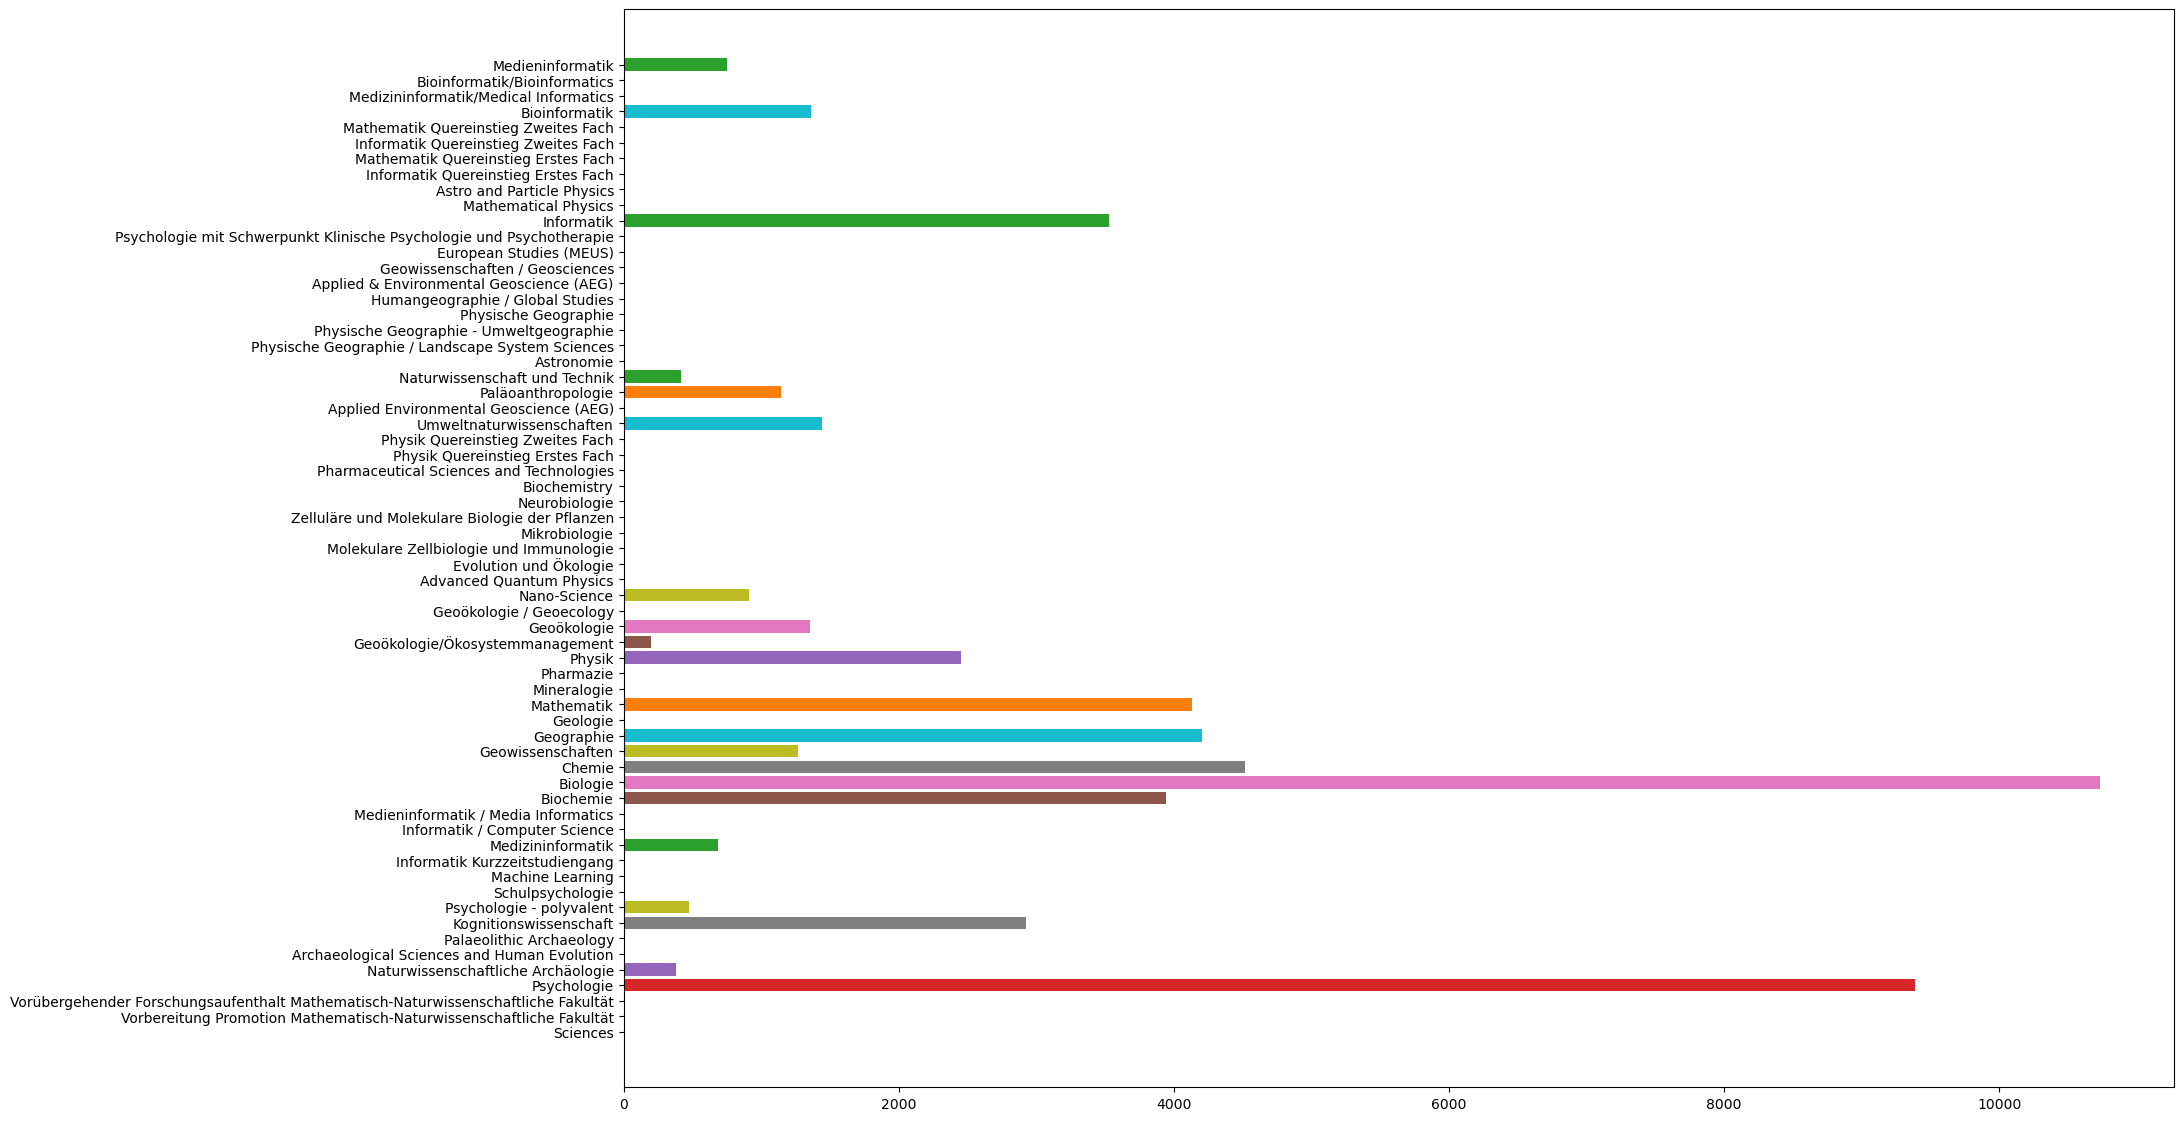

In [264]:
sumMales= allBachelorDegreesDF[allBachelorDegreesDF.index.get_level_values('Geschlecht') == 'männlich'].sum(axis=1)
sumFemales = allBachelorDegreesDF[allBachelorDegreesDF.index.get_level_values('Geschlecht') == 'weiblich'].sum(axis=1)

fig,ax = plt.subplots(figsize=(20,14))

for (subject,_),amount in sumFemales.items():
    ax.barh(subject,amount)


[70, 40]
[2793, 2643]


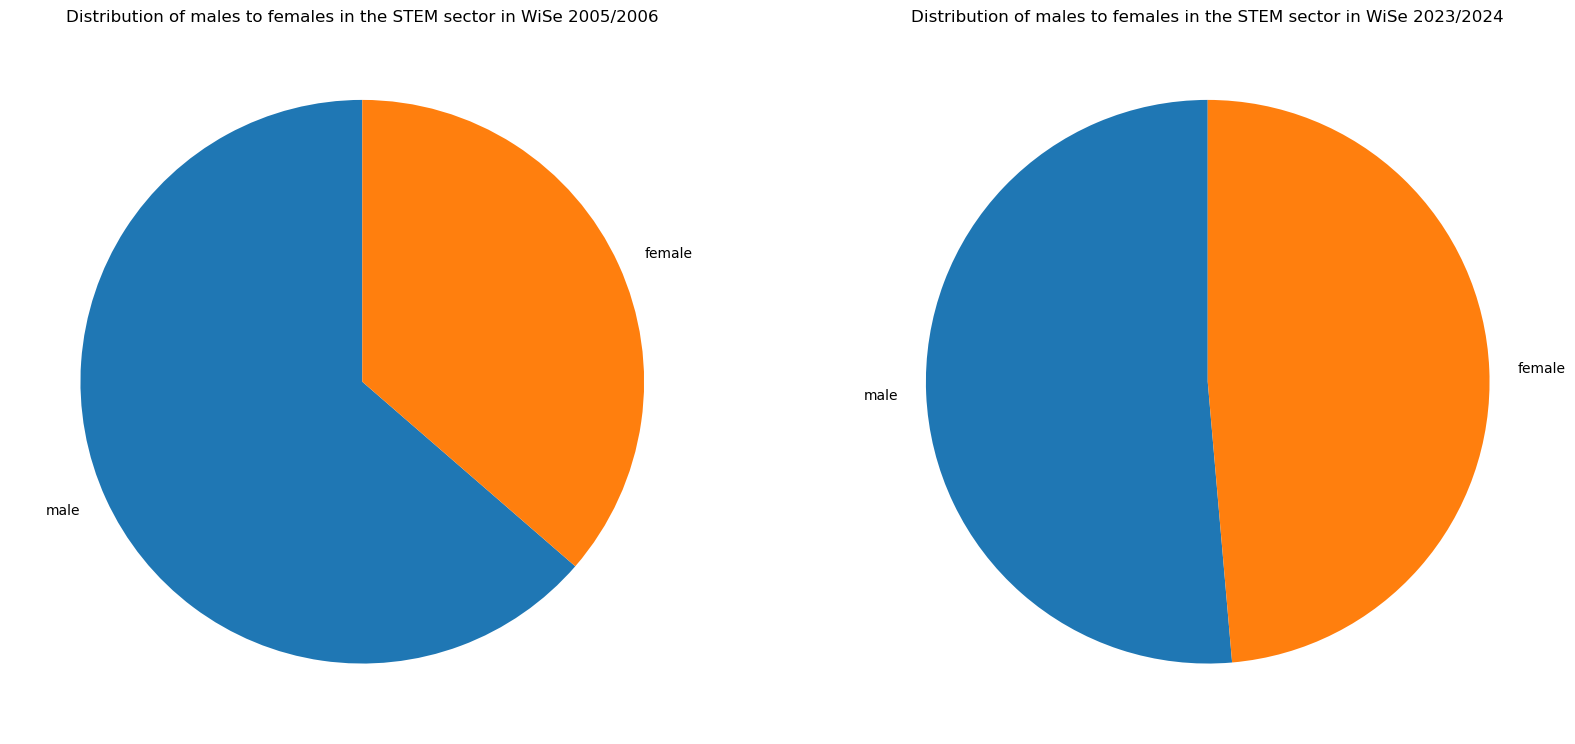

In [290]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))



onlyMaleWiSe2005 = allMaleBachelorDegreesDF.loc[:,"WiSe 2005/2006"]
onlyFemaleWiSe2005 = allFemaleBachelorDegreesDF.loc[:,"WiSe 2005/2006"]

data2005 = [onlyMaleWiSe2005.sum(axis=1).sum(),onlyFemaleWiSe2005.sum(axis=1).sum()]
labels = ["male", "female"]

print(data2005)

onlyMaleWiSe2023 = allMaleBachelorDegreesDF.loc[:,"WiSe 2023/2024"]
onlyFemaleWiSe2023 = allFemaleBachelorDegreesDF.loc[:,"WiSe 2023/2024"]
data2023 = [onlyMaleWiSe2023.sum(axis=1).sum(),onlyFemaleWiSe2023.sum(axis=1).sum()]

print(data2023)

ax[0].pie(data2005,labels=labels,startangle=90)
ax[1].pie(data2023,labels=labels,startangle=90)

ax[0].set_title("Distribution of males to females in the STEM sector in WiSe 2005/2006")
ax[1].set_title("Distribution of males to females in the STEM sector in WiSe 2023/2024")

# ax[0].pie(data2005, label)
plt.show()

Text(0.5, 1.0, 'Proportion of Subjects in the Dataset for WiSe 2023/2024')

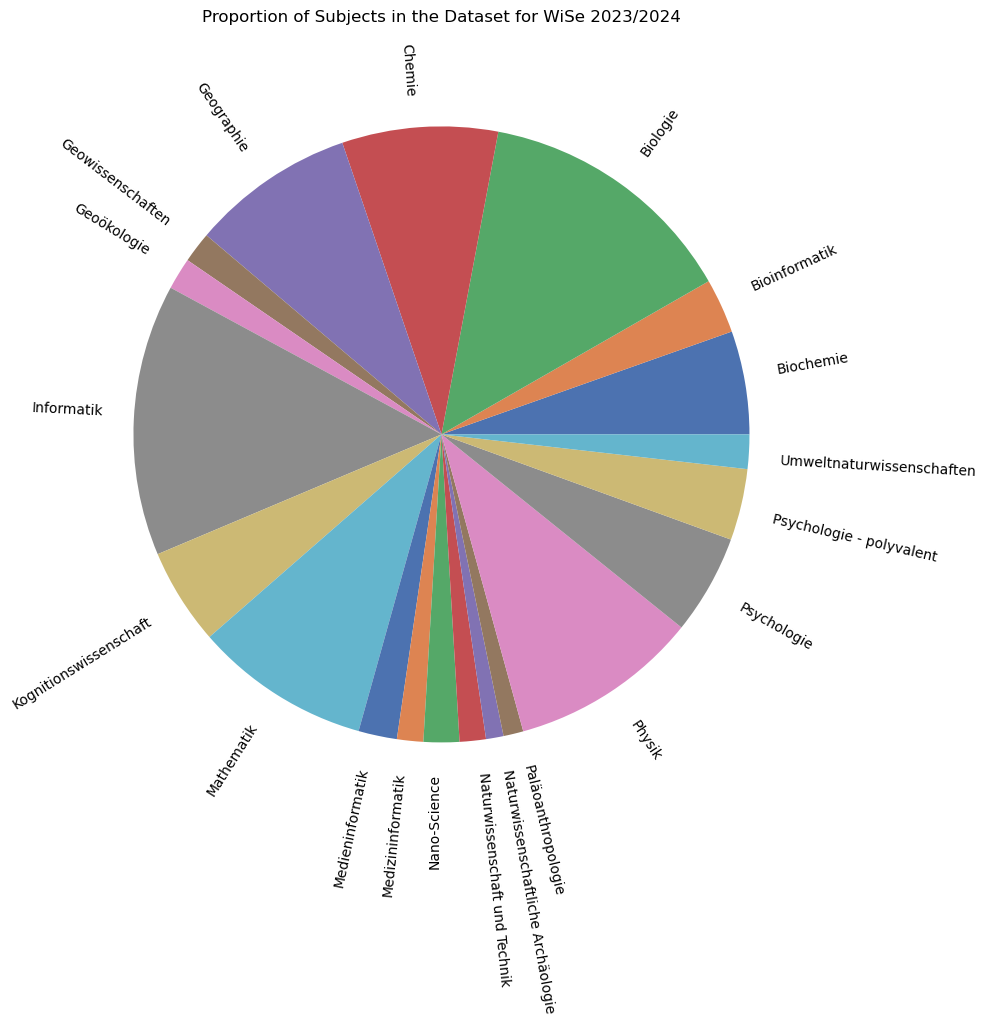

In [362]:
fig, ax = plt.subplots(figsize=(20,10))




allSubjects = allBachelorDegreesDF.index.get_level_values(0).unique()

allSubjectsWithoutGender = allBachelorDegreesDF["WiSe 2023/2024"].groupby(level=0).sum()
rowSums = allSubjectsWithoutGender.sum(axis=1)
filtered_df = allSubjectsWithoutGender[rowSums != 0]
cumulated= filtered_df.sum(axis=1)

labels = filtered_df.index.get_level_values(0).tolist()

colors = sns.color_palette("deep", n_colors=len(cumulated))


ax.pie(cumulated, labels=labels, rotatelabels=5, colors=colors);

plt.title("Proportion of Subjects in the Dataset for WiSe 2023/2024", pad=20, loc="center")




['Medizininformatik', 'Informatik', 'Bioinformatik', 'Medieninformatik']


/var/folders/jx/m3cxmskj415bp4_r5_ywn_l00000gn/T/ipykernel_26106/1194789750.py:16: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  onlyComputerScienceAccumulatedDF = onlyComputerScienceDF.groupby(by=onlyComputerScienceDF.columns.get_level_values(0), axis=1,sort=False).sum()


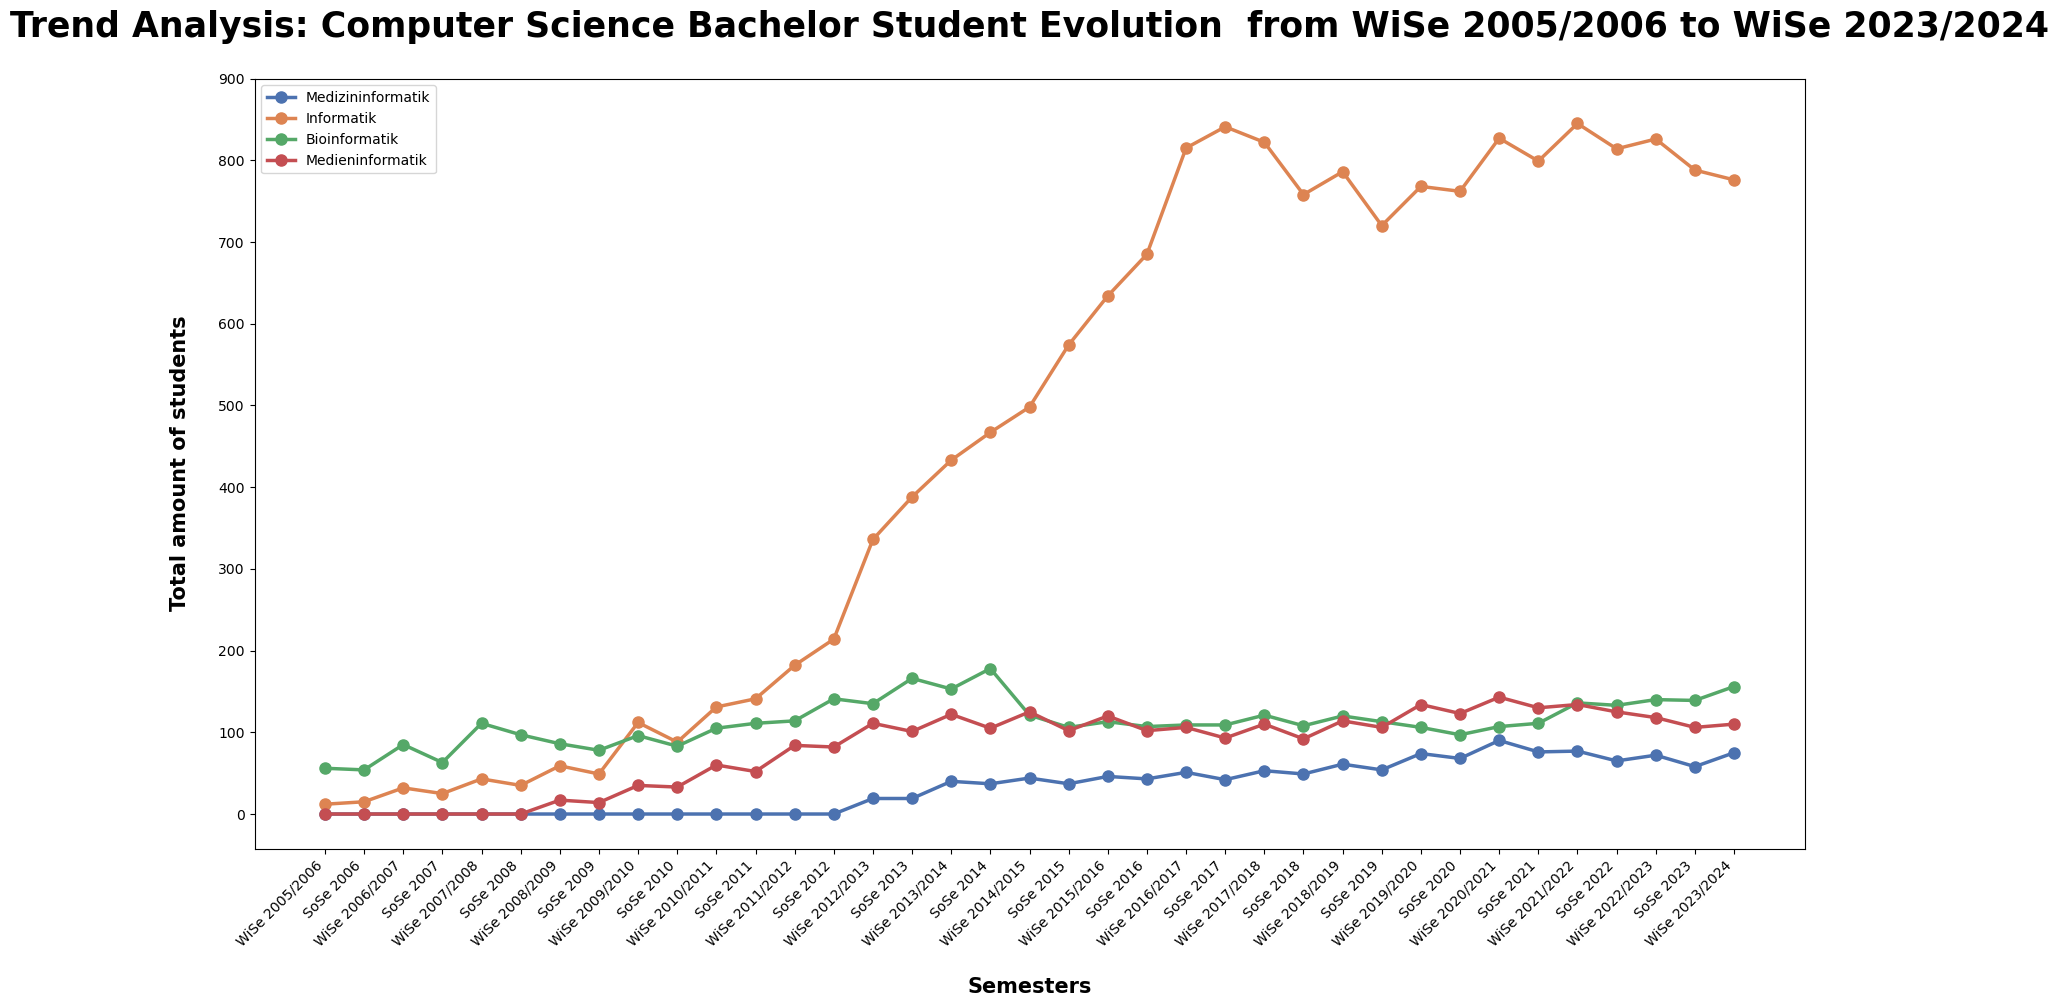

In [447]:
fig, ax = plt.subplots( figsize=(20,10))
colors = sns.color_palette("deep", 4)

rowSums = allBachelorDegreesDF.sum(axis=1)
# filtered_df = allSubjectsWithoutGender[rowSums != 0]

csPattern = re.compile(r"(.*[Ii]nformatik.*)")

csSubjects = [subject for subject in allBachelorDegreesDF.index.get_level_values(0).unique() if re.match(csPattern,subject) and  allBachelorDegreesDF.loc[pd.IndexSlice[subject, :], :].sum(axis=1).sum()!= 0]

print(csSubjects)

# computerScienceDegrees = []
# csSUbjects
onlyComputerScienceDF = allBachelorDegreesDF.loc[csSubjects].groupby(level=0).sum()
onlyComputerScienceAccumulatedDF = onlyComputerScienceDF.groupby(by=onlyComputerScienceDF.columns.get_level_values(0), axis=1,sort=False).sum()
onlyComputerScienceAccumulatedDF

for idx,subject in enumerate(csSubjects):
    ax.plot(YEARS, onlyComputerScienceAccumulatedDF.loc[subject,:], label=subject, linewidth=2.5,marker='o', markersize=8, color=colors[idx])



createPlotStyle("Trend Analysis: Computer Science Bachelor Student Evolution  from WiSe 2005/2006 to WiSe 2023/2024","Semesters","Total amount of students", 1000,100)

plt.legend()